In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [5]:
df.shape

(5572, 5)

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3760,ham,Was just about to ask. Will keep this one. May...,NaN,NaN,NaN
1984,spam,Urgent! Please call 09061743810 from landline....,NaN,NaN,NaN
2202,ham,(And my man carlos is definitely coming by mu ...,NaN,NaN,NaN
4094,ham,I ain't answerin no phone at what is actually ...,NaN,NaN,NaN
1025,ham,I have a sore throat. It's scratches when I talk,NaN,NaN,NaN


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvements depending on evluation
7. Converitng to a website

### 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 columns

In [10]:
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [13]:
df.sample(5)

,target,text
443,ham,"Sorry, I'll call later"
4809,ham,"Honey, can you pls find out how much they sell..."
3503,ham,Will you be here for food
3330,ham,How much it will cost approx . Per month.
21,ham,IÛ÷m going to try for 2 months ha ha only joking


### We want numeric values in target column in place of 'ham' and 'spam'

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep = 'first')

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

#### We want to see the distribution of ham and spam values

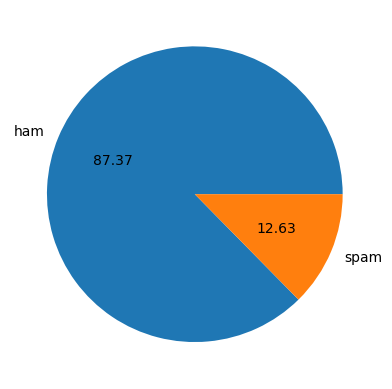

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
df['num_characters'] = df['text'].apply(len)

C:\Users\jmd\AppData\Local\Temp\ipykernel_10064\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['text'].apply(lambda x: nltk.word_tokenize(x)) # using word_tokenize to break the message into different words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [30]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # using word_tokenize to break the message into different words

C:\Users\jmd\AppData\Local\Temp\ipykernel_10064\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [46]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [47]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # using sent_tokenize to break the message into different sentecnes

C:\Users\jmd\AppData\Local\Temp\ipykernel_10064\941227403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # using sent_tokenize to break the message into different sentecnes


In [48]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [50]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [51]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

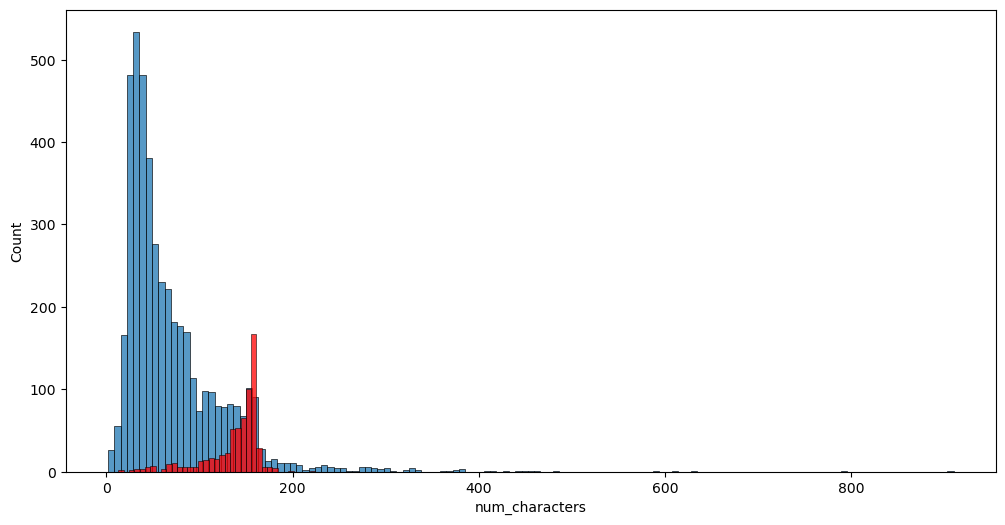

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='red')
plt.show()

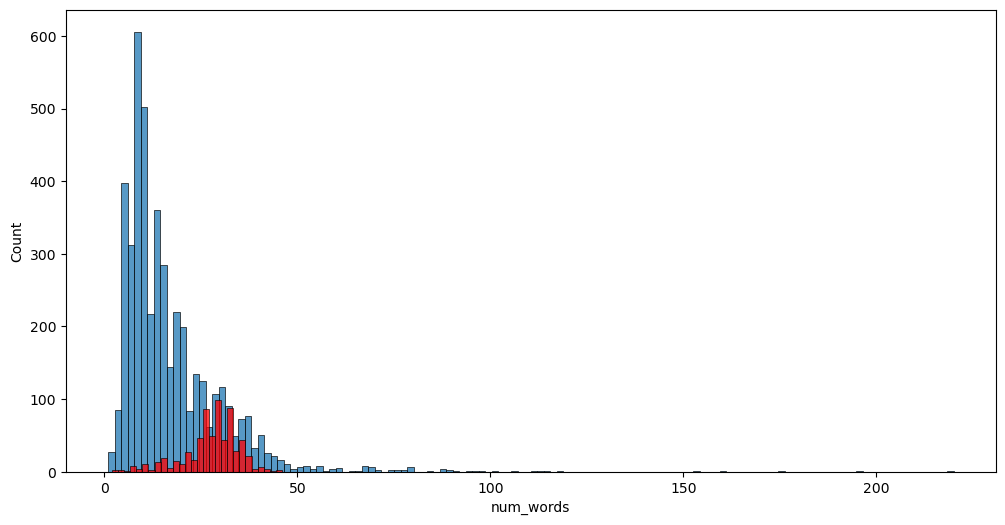

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color ='red')
plt.show()

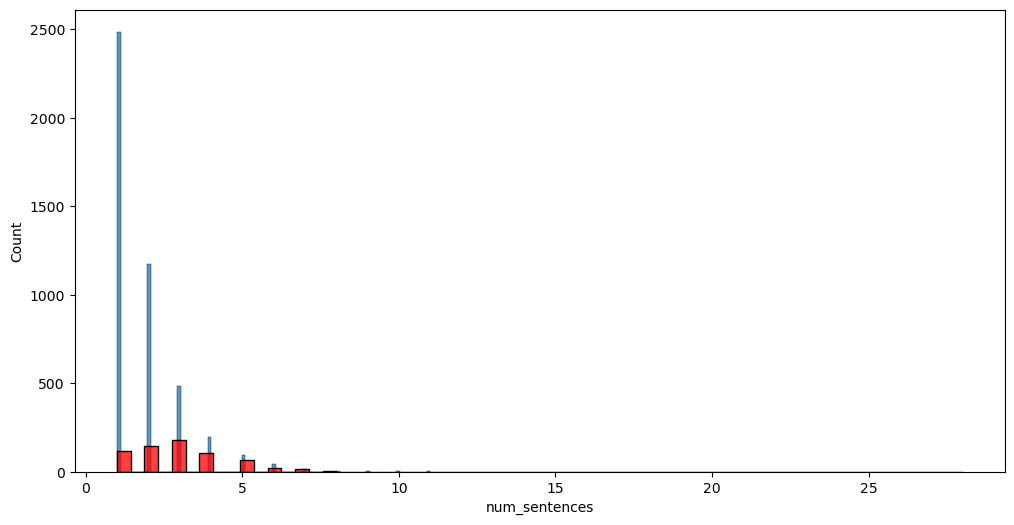

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color ='red')
plt.show()

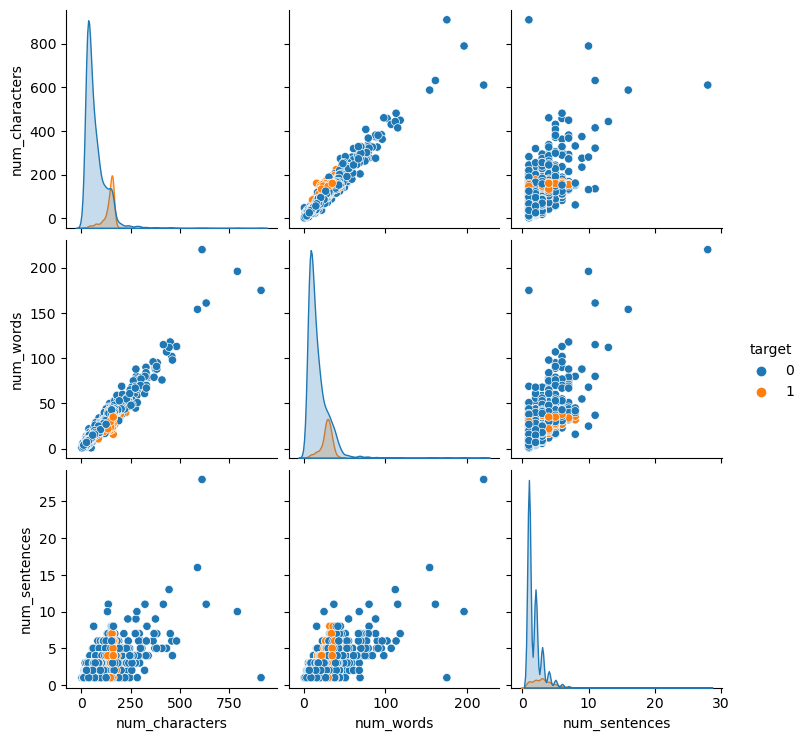

In [57]:
sns.pairplot(df,hue='target')
plt.show()

C:\Users\jmd\AppData\Local\Temp\ipykernel_10064\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

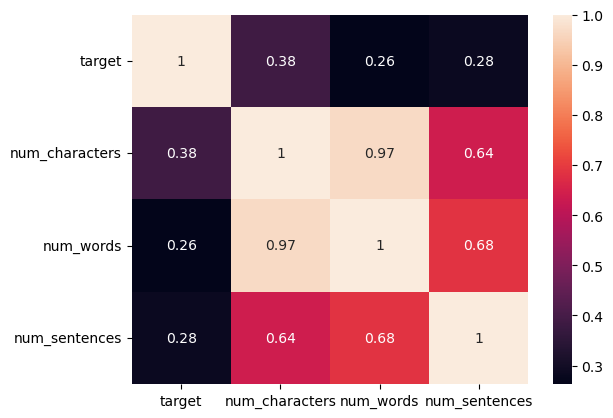

In [58]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

### 
1. Lower case
2. Tokenization
3. Remove special characters
4. Removing stop words and punctuations
5. Stemming

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [76]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
#from nltk.corpus import stopwords
#import string

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [79]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():# keeps only the alpha numeric characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # this text is different from earlier text, as it has no special characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        y = [*set(y)]
        
    return ' '.join(y)

In [80]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...' ) # special characters removed successfully

'e amor world avail point n la great got wat buffet crazi cine bugi go jurong'

In [81]:
ps.stem('dance')

'danc'

In [82]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [83]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\jmd\AppData\Local\Temp\ipykernel_10064\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,e amor world avail point n la great got wat bu...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar ok joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,08452810075over18 cup tkt receiv txt wkli fa s...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun c alreadi earli u hor say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,goe usf think live though around nah


### Making a wordcloud of spam keywords

In [86]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/152.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: C:\Users\jmd\anaconda3\python.exe -m pip install --upgrade pip


In [87]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [88]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =' '))

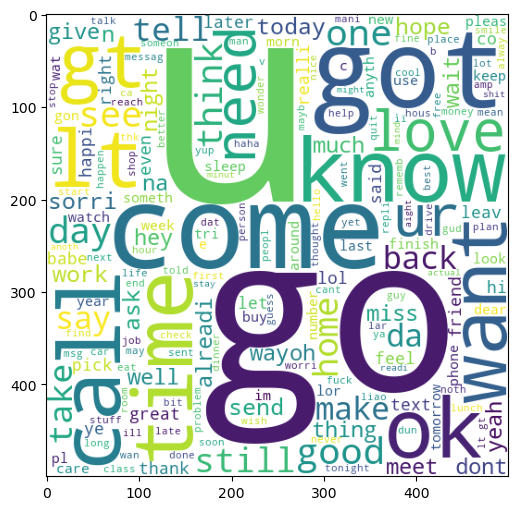

In [91]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [92]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =' '))

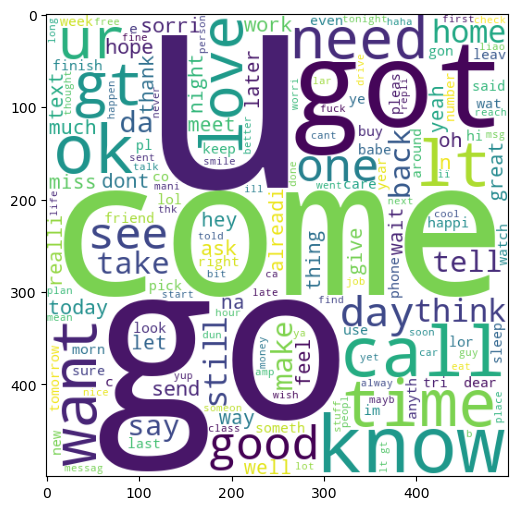

In [93]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### To make a list of all the words in Spam

In [94]:
df[df['target']==1]['transformed_text']

2       08452810075over18 cup tkt receiv txt wkli fa s...
5       week still tb like fun ok 3 back darl rcv hey ...
8       valid network hour prize call select kl341 cod...
9       08002986030 co 11 entitl call month latest r u...
11      tsandc appli 6day repli win info cash pound 10...
                              ...                        
5537    wc1n pobox explicit 30 sec want 3xx sex 2667 g...
5540    bailiff bill dont ye giv 3 3mobil min got mega...
5547    mnth nokia etc 11 remov motorola text doubl co...
5566    credit o2 pl postcod text repli remind 2 valid...
5567    minut contact 2 now1 2nd pound time prize easi...
Name: transformed_text, Length: 653, dtype: object

In [95]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [96]:
len(spam_corpus)

9389

In [97]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     283
1     146
2     131
3     118
4     106
5     100
6      94
7      94
8      93
9      90
10     89
11     86
12     74
13     72
14     63
15     63
16     58
17     56
18     56
19     51
20     50
21     50
22     48
23     48
24     46
25     45
26     45
27     44
28     44
29     43
Name: 1, dtype: int64

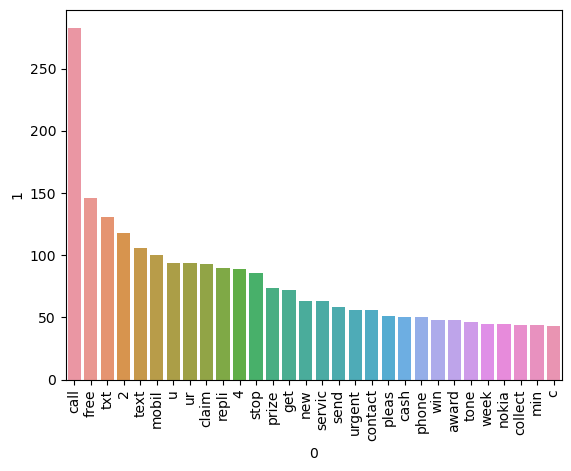

In [98]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [99]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [100]:
len(ham_corpus)

33471

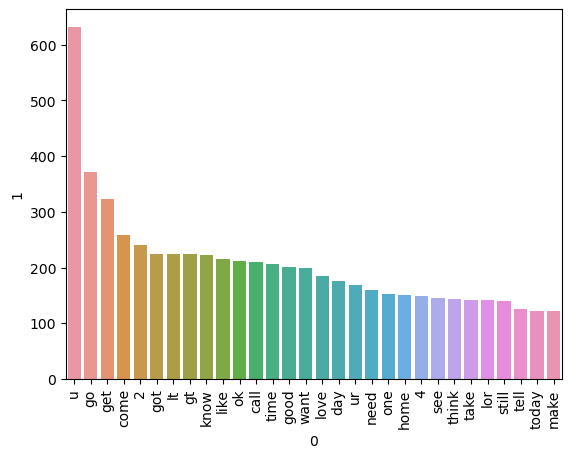

In [101]:
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building 
#### using Naive Bayes, since it works good on Textual data

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [103]:
X = cv.fit_transform(df['transformed_text']).toarray() #57:41mins

In [104]:
X.shape

(5169, 6708)

In [105]:
y=df['target'].values

In [106]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred1))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred1))

Accuracy Score :  0.8820116054158608
Confusion Matrix :  
 [[793 103]
 [ 19 119]]
Precision score :  0.536036036036036


In [112]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred2))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred2))

Accuracy Score :  0.965183752417795
Confusion Matrix :  
 [[873  23]
 [ 13 125]]
Precision score :  0.8445945945945946


In [113]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred3))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred3))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred3))

Accuracy Score :  0.9700193423597679
Confusion Matrix :  
 [[893   3]
 [ 28 110]]
Precision score :  0.9734513274336283


### Since we want higher precision (bcz data is imbalanced) there we will now try TFIDF method

In [284]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) #
X = tfidf.fit_transform(df['transformed_text']).toarray() #57:41mins

In [285]:
# from sklearn.preprocessing import MinMaxScaler #since standard scaler returns negative values which Naive Bayes doesn't accept
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [286]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [287]:
X.shape

(5169, 3000)

In [288]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [289]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [290]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [291]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred1))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred1))

Accuracy Score :  0.8762088974854932
Confusion Matrix :  
 [[793 103]
 [ 25 113]]
Precision score :  0.5231481481481481


In [293]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred2))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred2))

Accuracy Score :  0.9758220502901354
Confusion Matrix :  
 [[896   0]
 [ 25 113]]
Precision score :  1.0


In [278]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred3))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred3))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred3))

Accuracy Score :  0.9825918762088974
Confusion Matrix :  
 [[895   1]
 [ 17 121]]
Precision score :  0.9918032786885246


In [279]:
#pip install xgboost

In [280]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [281]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    #'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [282]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [283]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.941972920696325, 1.0)

In [252]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\jmd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9303675048355899
Precision -  0.7894736842105263
For  NB
Accuracy -  0.941972920696325
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9067796610169492
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096


In [226]:
#performance_df_0 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [227]:
#performance_df_0

In [228]:
#performance_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [229]:
#performance_df_scaled

,Algorithm,Accuracy,Precision
1,KN,0.907157,0.977273
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
4,LR,0.967118,0.956140
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
2,NB,0.978723,0.946154
6,AdaBoost,0.958414,0.927928
0,SVC,0.965184,0.918033
3,DT,0.935203,0.814159


In [253]:
#performance_df_newcol_numchars = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [263]:
#performance_df_newcol_numchars

In [209]:
#performance_df_p = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
#performance_df_p

In [160]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
#performance_df1

In [161]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

## Model Improvement

### 1. max_features
change the max_features parameter of Tfidf, earlier Null, now set to 3000

In [205]:
#performance_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [230]:
#performance_df_3000

In [231]:
#performance_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [256]:
#performance_df_newcol_numchars = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [257]:
performance_df_newcol_numchars

,Algorithm,Accuracy_num_chars,Precision_num_chars
2,NB,0.941973,1.000000
7,ETC,0.978723,0.983333
5,RF,0.971954,0.982301
4,LR,0.955513,0.960000
8,GBDT,0.947776,0.928571
9,xgb,0.969052,0.927419
6,AdaBoost,0.959381,0.906780
3,DT,0.943907,0.877358
1,KN,0.930368,0.789474
0,SVC,0.866538,0.000000


In [207]:
new_df = performance_df.merge(performance_df_3000,on='Algorithm')

In [233]:
new_df_3itr = new_df.merge(performance_df_scaled,on = 'Algorithm')

In [234]:
new_df_3itr

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.899420,1.000000,0.904255,1.000000,0.907157,0.977273
1,NB,0.956480,1.000000,0.975822,1.000000,0.978723,0.946154
2,RF,0.974855,0.991228,0.974855,0.974576,0.974855,0.974576
3,ETC,0.973888,0.974359,0.976789,0.975000,0.976789,0.975000
4,SVC,0.972921,0.974138,0.976789,0.975000,0.965184,0.918033
5,xgb,0.974855,0.966667,0.971954,0.950413,0.971954,0.950413
6,AdaBoost,0.959381,0.936364,0.958414,0.927928,0.958414,0.927928
7,LR,0.946809,0.927835,0.951644,0.940000,0.967118,0.956140
8,GBDT,0.951644,0.892857,0.956480,0.951456,0.956480,0.951456
9,DT,0.938104,0.842593,0.933269,0.810811,0.935203,0.814159


In [260]:
new_df_4itr = new_df_3itr.merge(performance_df_newcol_numchars,on = 'Algorithm')

In [261]:
new_df_4itr

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.899420,1.000000,0.904255,1.000000,0.907157,0.977273,0.930368,0.789474
1,NB,0.956480,1.000000,0.975822,1.000000,0.978723,0.946154,0.941973,1.000000
2,RF,0.974855,0.991228,0.974855,0.974576,0.974855,0.974576,0.971954,0.982301
3,ETC,0.973888,0.974359,0.976789,0.975000,0.976789,0.975000,0.978723,0.983333
4,SVC,0.972921,0.974138,0.976789,0.975000,0.965184,0.918033,0.866538,0.000000
5,xgb,0.974855,0.966667,0.971954,0.950413,0.971954,0.950413,0.969052,0.927419
6,AdaBoost,0.959381,0.936364,0.958414,0.927928,0.958414,0.927928,0.959381,0.906780
7,LR,0.946809,0.927835,0.951644,0.940000,0.967118,0.956140,0.955513,0.960000
8,GBDT,0.951644,0.892857,0.956480,0.951456,0.956480,0.951456,0.947776,0.928571
9,DT,0.938104,0.842593,0.933269,0.810811,0.935203,0.814159,0.943907,0.877358


In [149]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [150]:
#new_df_scaled

In [269]:
#temp_df

In [268]:
#performance_df.merge(temp_df,on='Algorithm') # both values are same as we have run the same code for them, correct it later

## Try Scaling

In [138]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [264]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [265]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [266]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [267]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9400386847195358
Precision 1.0


In [271]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

# from sklearn.ensemble import StackingClassifier

# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))



Accuracy 0.9777562862669246
Precision 0.9389312977099237


In [294]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))